# Decision Tree Pipeline


## Decision Tree Modeling and Analysis

### This file is a pipeline of Decision Tree modeling and subsequent interpretation of the model. 

The Pipeline will be as follows:

1. Read the data in with custom function built.
2. Fit the model to training data and verify results. Because there are only roughly 600 instances, we will complete the training and evaluation of testing data for 30 iterations, to validate the consistency of the model. This process will use custom function in the `Evaluation.py` module. 
3. Visualize the coefficients and analize its output. . 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from data_import import load_boston
from Evaluation import score_regressor


In [2]:
#Read in the data as pandas dataframe
X, y = load_boston()

#quick look to see above worked. 
X.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Decision Tree

In [4]:
tree = DecisionTreeRegressor(max_depth=4)

rmse_scores_tree, r2_scores_tree = score_regressor(X, y, tree)


 Average Test RMSE: 4.585293692028841

 Average Test R^2 Score: 0.7372930774210009

First 30 RMSE scores: [5.3674 3.7184 5.6981 3.7762 5.4726 5.3223 5.8238 4.9517 4.2672 5.3634
 4.1946 4.1454 4.4134 4.5255 5.1493 4.6824 4.1307 3.7211 4.0451 4.1285
 5.3902 3.9347 5.9244 4.2794 4.8585 3.9899 4.2631 5.0237 4.5948 4.5834]

First 30 R^2 scores: [0.647 0.86  0.634 0.824 0.701 0.657 0.607 0.682 0.774 0.677 0.824 0.788
 0.779 0.772 0.65  0.738 0.735 0.821 0.8   0.847 0.64  0.818 0.582 0.775
 0.681 0.777 0.779 0.706 0.737 0.702]


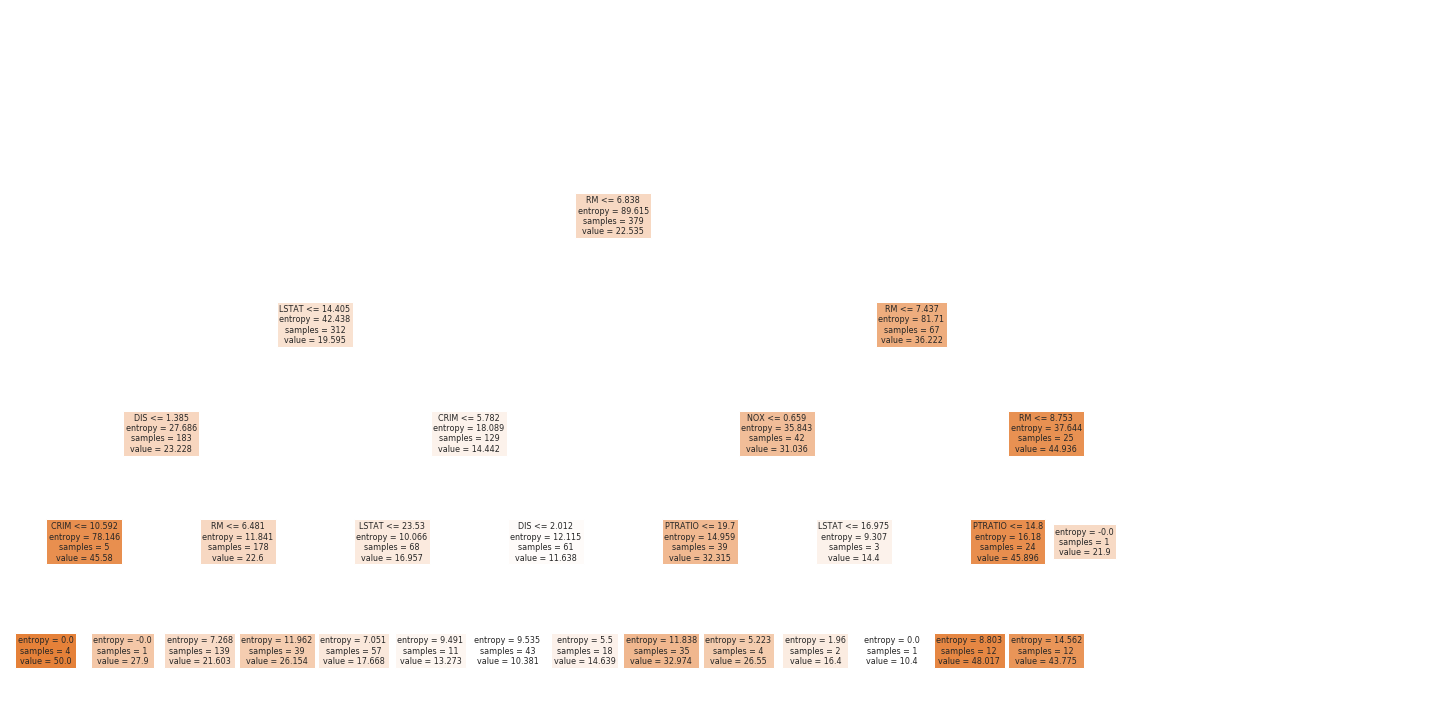

In [5]:
fig = plt.figure(figsize = (20, 10))
img = plot_tree(tree, feature_names=X.columns, 
                filled=True, fontsize = 8)
plt.tight_layout()
fig.savefig('../images/Basic_decision_tree.png')


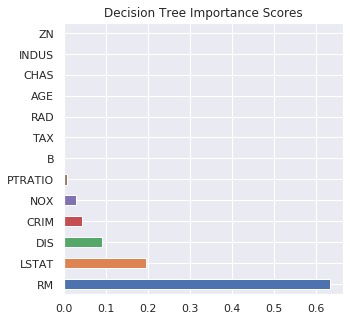

In [6]:
#show feature importances
fig = plt.figure(figsize = (5,5))
importances = pd.Series(tree.feature_importances_, index=X.columns) \
.sort_values(ascending = False).plot(kind = 'barh', title='Decision Tree Importance Scores')
fig.savefig('../images/Basic_decision_tree_importance.png', bbox_inches = 'tight')

## Interpretation

The number of rooms is the most important feature for this 4-depth decision tree regressor, followed by the percentage of lower status in the population. In image of the tree, _RM_ is the first node split on, and indicates that if the number of rooms in the house is above 6.5, then the price of the house will likely be on the higer side. If the number of rooms is above 7.4, then the price of the house is near the end range of prices for the house. If a house has less than 6.5 rooms, then its price becomes moreso affected by other factors, such as _LSTAT_, _CRIM_, and _DIS.
